### Nama: Gabriella Caesaria Vianney
### NIM: 2209106007
### Kelas: Praktikum KB A1 2022
## POSTTEST 5

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans

In [3]:
gaby = pd.read_csv('cleaned_all_phones.csv')
gaby.head()

,phone_name,brand,os,inches,resolution,battery,battery_type,ram(GB),announcement_date,weight(g),...,video_1080p,video_4K,video_8K,video_30fps,video_60fps,video_120fps,video_240fps,video_480fps,video_960fps,price(USD)
0,Y6II Compact,Huawei,Android 5.1,5.0,720x1280,2200,Li-Po,2,2016-09-01,140.0,...,False,False,False,True,False,False,False,False,False,120.0
1,K20 plus,LG,Android 7.0,5.3,720x1280,2700,Li-Ion,2,2016-12-01,140.0,...,True,False,False,True,False,False,False,False,False,100.0
2,P8 Lite (2017),Huawei,Android 7.0,5.2,1080x1920,3000,Li-Ion,4,2017-01-01,147.0,...,True,False,False,True,False,False,False,False,False,420.0
3,Redmi Note 4,Xiaomi,Android 6.0,5.5,1080x1920,4100,Li-Po,4,2017-01-01,165.0,...,True,False,False,True,False,True,False,False,False,150.0
4,P10,Huawei,Android 7.0,5.1,1080x1920,3200,Li-Ion,4,2017-02-01,145.0,...,True,True,False,True,True,False,False,False,False,420.0


In [4]:
gaby.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   phone_name         1512 non-null   object 
 1   brand              1512 non-null   object 
 2   os                 1512 non-null   object 
 3   inches             1512 non-null   float64
 4   resolution         1512 non-null   object 
 5   battery            1512 non-null   int64  
 6   battery_type       1512 non-null   object 
 7   ram(GB)            1512 non-null   int64  
 8   announcement_date  1512 non-null   object 
 9   weight(g)          1512 non-null   float64
 10  storage(GB)        1512 non-null   int64  
 11  video_720p         1512 non-null   bool   
 12  video_1080p        1512 non-null   bool   
 13  video_4K           1512 non-null   bool   
 14  video_8K           1512 non-null   bool   
 15  video_30fps        1512 non-null   bool   
 16  video_60fps        1512 

### A. SUPERVISED LEARNING
#### A1. Mengimplementasikan metode
##### a. Support Vector Clustering menggunakan SVM

In [5]:
X2 = gaby[['inches', 'weight(g)']]
y2 = gaby['battery_type']

# Mengubah nilai yang bukan Li-Ion menjadi non-Li-Ion
y2 = np.where(y2 == 'Li-Ion', 'Li-Ion', 'Non-Li-Ion')

##### Mengatur perbandingan training set dan test set menjadi 80:20

In [6]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X2, y2, test_size=0.2, random_state=30
)

##### melatih model SVC

In [7]:
svm = SVC(kernel="linear")
svm.fit(X_train2, y_train2)

SVC(kernel='linear')

In [8]:
y_pred2 = svm.predict(X_test2) #prediksi dengan X_test dari gaby

sv = svm.support_vectors_ # ambil nilai support vector dari objek
sv

array([[  6.4 , 156.  ],
       [  5.2 , 137.  ],
       [  6.2 , 178.  ],
       [  6.2 , 169.  ],
       [  5.5 , 170.  ],
       [  6.2 , 170.  ],
       [  6.  , 221.  ],
       [  6.5 , 208.  ],
       [  6.4 , 156.  ],
       [  6.2 , 168.  ],
       [  6.21, 160.  ],
       [  6.3 , 191.  ],
       [  6.2 , 170.  ],
       [  6.  , 176.  ],
       [  6.21, 160.  ],
       [  5.5 , 181.  ],
       [  6.5 , 189.  ],
       [  5.46, 195.  ],
       [  6.5 , 180.  ],
       [  6.6 , 198.  ],
       [  5.99, 155.  ],
       [  6.4 , 197.  ],
       [  6.2 , 168.  ],
       [  6.2 , 165.  ],
       [  5.7 , 143.  ],
       [  6.67, 175.  ],
       [  6.26, 168.  ],
       [  5.99, 155.  ],
       [  6.1 , 204.  ],
       [  6.3 , 169.  ],
       [  5.8 , 163.  ],
       [  6.  , 193.  ],
       [  6.  , 162.  ],
       [  6.22, 161.  ],
       [  6.  , 178.  ],
       [  5.8 , 174.  ],
       [  6.7 , 192.  ],
       [  5.7 , 156.  ],
       [  5.7 , 198.  ],
       [  5.5 , 153.  ],


##### b. Regression Linear

In [14]:
X = gaby[['ram(GB)']]
y = gaby['price(USD)']

##### Mengatur perbandingan training set dan test set menjadi 80:20

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

##### melatih model regresi linear

In [16]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

##### Melakukan prediksi

In [17]:
y_pred = reg.predict(X_test)

In [18]:
y_score = reg.score(X_test, y_test)
y_score

0.11951326458717049

#### A2. Hasil Prediksi##### a. Klasifikasi

In [19]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report as cr

In [20]:
# Hitung confusion matrix
cm = confusion_matrix(y_test2 ,y_pred2)
cm

array([[ 19,  36],
       [  8, 240]], dtype=int64)

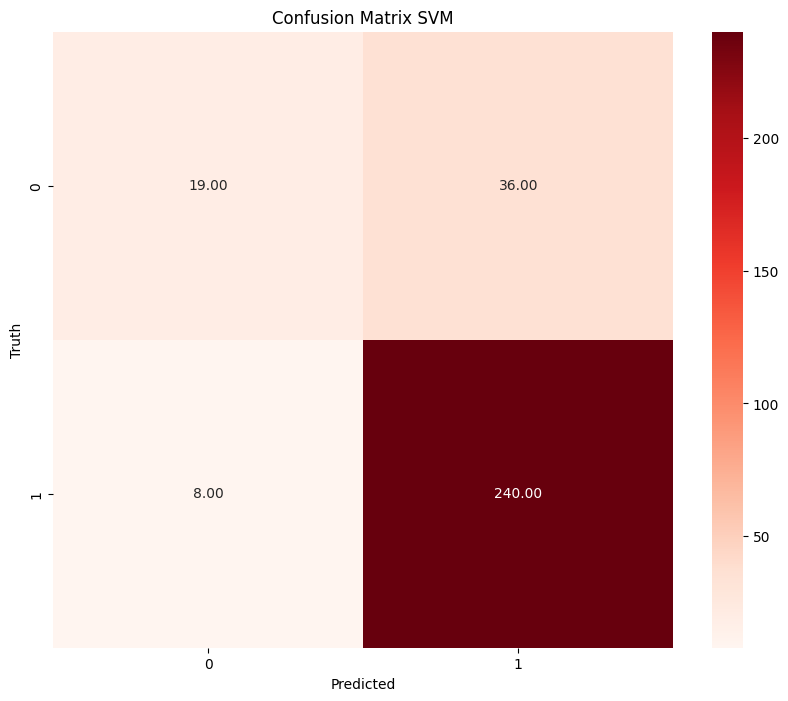

In [21]:
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='.2f', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix SVM')
plt.show()

In [22]:
result = cr(y_test2, y_pred2)
print(result)

              precision    recall  f1-score   support

      Li-Ion       0.70      0.35      0.46        55
  Non-Li-Ion       0.87      0.97      0.92       248

    accuracy                           0.85       303
   macro avg       0.79      0.66      0.69       303
weighted avg       0.84      0.85      0.83       303



##### Hasil ini menunjukan bahwa model memiliki performa yang baik dalam mengklasifikasikan kelas "Non-Li-Ion" (tinggi pada precision, recall, dan F1-Score), tetapi memiliki performa yang lebih rendah dalam mengklasifikasikan kelas "Li-Ion" (lebih rendah pada precision, recall, dan F1-Score). Akurasi keseluruhan model adalah 0.85.

##### b. Regresi

In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from numpy import sqrt

In [24]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
r2 = r2_score(y_test, y_pred)

# print (mae, mse, rmse, r2, sep='\n')
print(f" MAE {mae}\n MSE {mse}\n RMSE {rmse}\n R2 {r2}")

 MAE 160.46688570496318
 MSE 60500.93936069032
 RMSE 245.96938703970932
 R2 0.11951326458717049


##### Hasil evaluasi model regresi ini menunjukkan bahwa model memiliki Mean Absolute Error (MAE) sekitar 160.47, yang mengindikasikan rata-rata kesalahan prediksi sebesar 160.47 unit. Mean Squared Error (MSE) adalah sekitar 60500.94, dengan Root Mean Squared Error (RMSE) sekitar 245.97, yang merupakan akar kuadrat dari MSE. R-squared (R2) adalah sekitar 0.12, yang mengindikasikan bahwa model hanya menjelaskan sekitar 11.95% dari variabilitas dalam data.

#### A3. Plot Hasil Prediksi##### a. Menggunakan SVM

C:\Users\Laptop ASUS TUF\venv_A1_22\gabriella_007\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Text(0, 0.5, 'price(USD)')

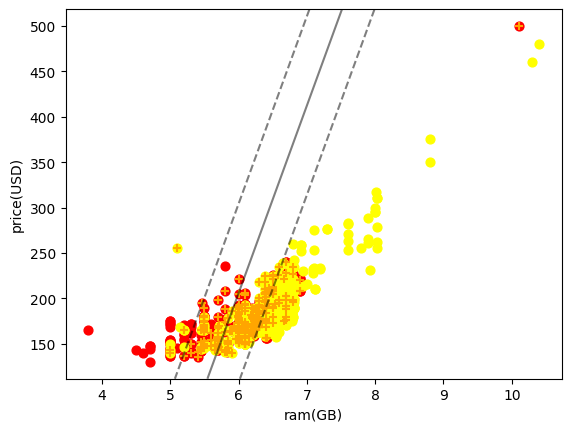

In [25]:
# plot data points dari CBH
plt.scatter(X2[y2 == 'Li-Ion'].iloc[:,0], 
            X2[y2 == 'Li-Ion'].iloc[:,1], 
            s=40, c='red', marker='o', label='Li-Ion')

#Plot data points dari non-CBH
plt.scatter(X2[y2 == 'Non-Li-Ion'].iloc[:,0],
            X2[y2 == 'Non-Li-Ion'].iloc[:,1],
            s=40, c='yellow', marker='o', label='Non-Li-Ion')

# Tampilkan Titik-Titik Support Vectors-nya
plt.scatter(sv[:, 0], sv[:, 1], s=40,
color='orange', marker='+', label='Support Vectors')

# Buat garis Decision Boundary (Ruang Keputusan)
ax = plt.gca() # gca() = "Get Current Axes"
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Buat sebuah meshgrid untuk evaluasi model
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1]), # Linear Space x
np.linspace(ylim[0], ylim[1])) # Linear Space y
Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()]) # Concatenate
Z = Z.reshape(xx.shape) # Reshape titik agar sesuai dengan sumbu x
# Buat grafik Decision Boundary dan garis Marginnya
ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,

linestyles=['--', '-', '--'])

#Plot data points dari support vector
# plt.scatter()

plt.xlabel("ram(GB)")
plt.ylabel("price(USD)")

##### B. Menggunakan regresi linear

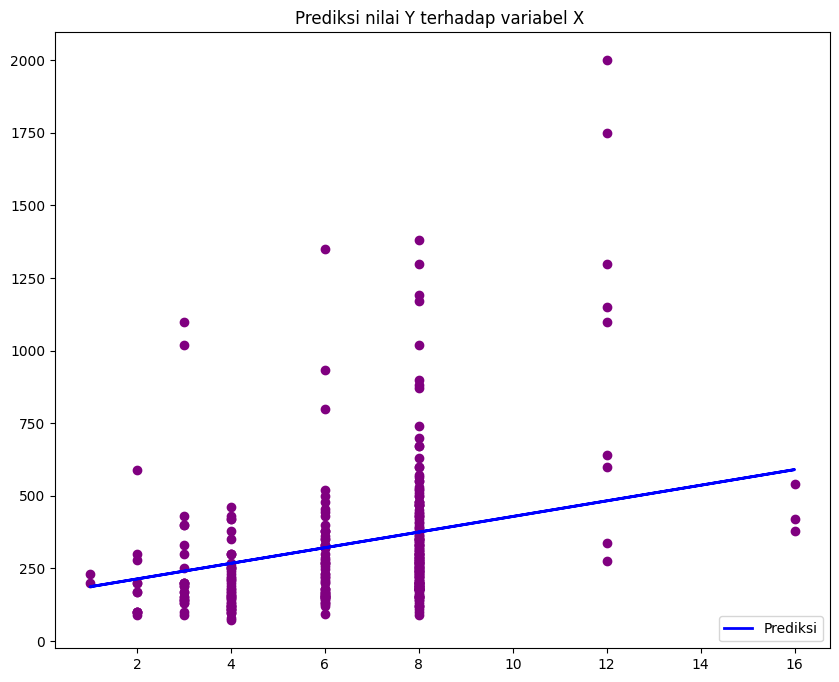

In [29]:
plt.figure(figsize=(10,8))
plt.scatter (X_test, y_test, c="purple") # c = color
plt.plot(X_test, y_pred, c="blue", linewidth=2, label='Prediksi')
plt.legend(loc='lower right') #loc = lokasi (upper/lower)
plt.title('Prediksi nilai Y terhadap variabel X ')
plt.show()

### B. UNSUPERVISED LEARNING#### B1. Mengimplementasikan metode K-MEANS

In [32]:
X = gaby[['ram(GB)', 'price(USD)']]
K = 2

kmeans = KMeans(n_clusters=K, n_init=10) 
kmeans.fit(X)

cluster_labels = kmeans.labels_
gaby["cluster"] = cluster_labels
centroids = kmeans.cluster_centers_
cluster_mapping = {0: 1, 1: 0}
gaby['cluster'] = gaby['cluster'].map(cluster_mapping)

### B2. Cluster yg telah diprediksi#### a. Tanpa label asli

In [33]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

In [34]:
# Menghitung metrik-metrik klastering
def calculate_clustering_metrics(X, labels):
    ss_score = silhouette_score(X, labels)
    db_index = davies_bouldin_score(X, labels)
    ch_index = calinski_harabasz_score(X, labels)
    return ss_score, db_index, ch_index

# label klastering
labels = gaby['cluster']

# Hitung metrik-metrik klastering
ss, db, ch = calculate_clustering_metrics(X, labels)

# Print hasil metrik klastering
print(f"Silhouette Score: {ss:.2f}")
print(f"Davies-Bouldin Index: {db:.2f}")
print(f"Calinski-Harabasz Index: {ch:.2f}")

Silhouette Score: 0.75
Davies-Bouldin Index: 0.51
Calinski-Harabasz Index: 2669.72


##### Hasil evaluasi clustering ini menunjukkan bahwa pengelompokan data memiliki kualitas yang baik. Silhouette Score sebesar 0.75 menunjukkan tingkat kesamaan yang tinggi antara anggota cluster dengan cluster yang sama dan berbeda dari cluster lainnya. Davies-Bouldin Index yang rendah (0.51) mengindikasikan pemisahan cluster yang baik. Sementara itu, Calinski-Harabasz Index yang tinggi (2669.72) menunjukkan varian yang tinggi antara cluster dan varian yang rendah dalam cluster, menggambarkan pengelompokan yang efisien.

##### b. Dengan label asli
##### Mengubah label kategorikal menjadi numerik

In [35]:
# Membuat objek LabelEncoder
label_encoder = LabelEncoder()

# Menggunakan LabelEncoder untuk mengubah label kategorikal menjadi numerik
gaby['brand'] = label_encoder.fit_transform(gaby['brand'])

In [36]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, homogeneity_score, completeness_score

In [37]:
true_labels = gaby['brand']

# Evaluasi dengan metrik ARI
ari_score = adjusted_rand_score(true_labels, gaby['cluster'])
print(f"Adjusted Rand Index: {ari_score:.2f}")

# Evaluasi dengan metrik NMI
nmi_score = normalized_mutual_info_score(true_labels, gaby['cluster'])
print(f"Normalized Mutual Information: {nmi_score:.2f}")

# Evaluasi dengan metrik homogeneity
homogeneity = homogeneity_score(true_labels, gaby['cluster'])
print(f"Homogeneity: {homogeneity:.2f}")

# Evaluasi dengan metrik completeness
completeness = completeness_score(true_labels, gaby['cluster'])
print(f"Completeness: {completeness:.2f}")

Adjusted Rand Index: 0.01
Normalized Mutual Information: 0.01
Homogeneity: 0.01
Completeness: 0.05


##### Hasil evaluasi clustering menunjukkan bahwa pengelompokan yang ditemukan oleh model memiliki tingkat kesamaan yang sangat rendah dengan pengelompokan sebenarnya dalam dataset. Metrik seperti Adjusted Rand Index (ARI) dan Normalized Mutual Information (NMI) mendekati nol, menunjukkan kurangnya kesesuaian antara cluster model dengan cluster sebenarnya. Selain itu, metrik Homogeneity dan Completeness juga memiliki nilai yang sangat rendah, menunjukkan bahwa cluster yang ditemukan oleh model tidak homogen dan tidak dapat mengidentifikasi semua anggota kelas yang sama. Hasil ini mengindikasikan bahwa model clustering saat ini tidak efektif dalam memisahkan data ke dalam kelompok yang relevan dengan struktur sebenarnya dalam data, dan perlu ditingkatkan.

##### B3. Plot hasil clustering

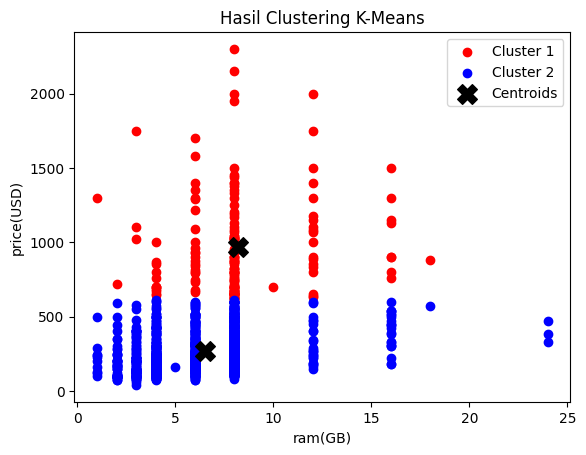

In [84]:
figsize=(10,6)
X = gaby[['ram(GB)', 'price(USD)']]

# Plot data untuk setiap cluster
plt.scatter(X[gaby['cluster'] == 0]['ram(GB)'],
            X[gaby['cluster'] == 0]['price(USD)'],
            c='red', label='Cluster 1')
plt.scatter(X[gaby['cluster'] == 1]['ram(GB)'],
            X[gaby['cluster'] == 1]['price(USD)'],
            c='blue', label='Cluster 2')

# Plot centroids
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X',
            s=200, c='black', label='Centroids')

plt.xlabel('ram(GB)')
plt.ylabel('price(USD)')
plt.title('Hasil Clustering K-Means')
plt.legend()
plt.show()